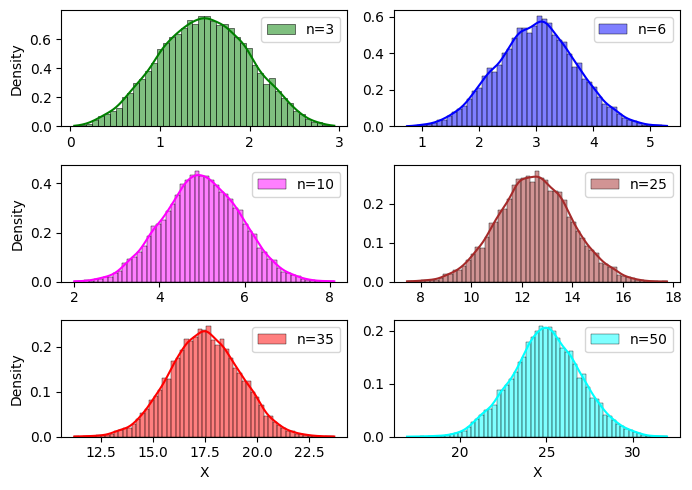

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Number of random sequences to generate
len_random_array = 10000  

# Values of n (number of summed random variables)
ns = [3, 6, 10, 25, 35, 50]  
colours = ['green', 'blue', 'magenta', 'brown', 'red', 'cyan']

# Create 3x2 subplot grid for six histograms
fig, ax = plt.subplots(3, 2, figsize=(7, 5))

for k, n in enumerate(ns):
    r, c = divmod(k, 2)  # row and column indices

    # Generate len_random_array X n matrix of uniform random numbers
    rnds = np.empty((n, len_random_array))
    for i in range(n):
        rnds[i] = np.random.rand(len_random_array)
    
    # Sum across the n sequences (linear combination)
    rnd = np.zeros(len_random_array)
    for i in range(n):
        rnd += rnds[i]
    
    # Plot histogram with kernel density overlay
    g = sns.histplot(
        rnd, ax=ax[r, c], stat='density', kde=True,
        color=colours[k], label=f'n={ns[k]}'
    )
    ax[r, c].legend()
    
    # Restore y-labels on left column
    if c == 0:
        ax[r, c].set_ylabel('Density')
    else:
        ax[r, c].set_ylabel('')  # remove y-label on right column
    
    # Restore x-labels on bottom row
    if r == 2:
        ax[r, c].set_xlabel('X')
    else:
        ax[r, c].set_xlabel('')  # remove x-label on upper rows

plt.tight_layout()
fig.savefig('img/clt_six_panel_histograms.jpg')  # save before showing
plt.show()


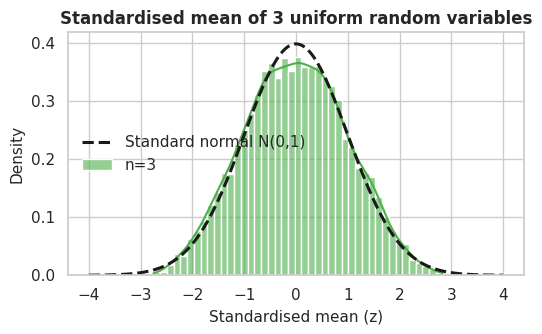

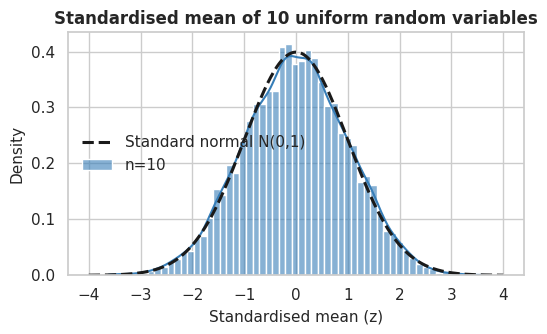

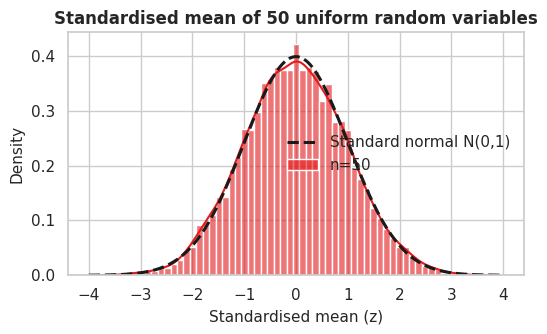

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Global style
sns.set_theme(style="whitegrid")

# Settings
len_random_array = 10000
ns = [3, 10, 50]   # sample sizes
colours = ['#4daf4a', '#377eb8', '#e41a1c']  # colourblind-friendly palette

# Mean and standard deviation of U(0,1)
mu, sigma = 0.5, np.sqrt(1/12)

for i, n in enumerate(ns):
    # Generate n × len_random_array matrix of uniform(0,1)
    rnds = np.random.rand(n, len_random_array)
    means = rnds.mean(axis=0)

    # Standardise the sample mean
    z = (means - mu) / (sigma / np.sqrt(n))

    # Create figure
    fig, ax = plt.subplots(figsize=(5.5, 3.5))

    # Plot histogram with KDE
    sns.histplot(
        z, stat="density", kde=True,
        color=colours[i], alpha=0.6,
        edgecolor="white", linewidth=1.0,
        label=f'n={n}', ax=ax
    )

    # Overlay the standard normal density curve
    x = np.linspace(-4, 4, 400)
    ax.plot(x, norm.pdf(x, 0, 1),
            'k--', lw=2.2, label='Standard normal N(0,1)')

    # Labels and title
    ax.set_title(f'Standardised mean of {n} uniform random variables',
                 fontsize=12, weight="bold")
    ax.set_xlabel("Standardised mean (z)", fontsize=11)
    ax.set_ylabel("Density", fontsize=11)

    ax.legend(frameon=False)
    plt.tight_layout()
    plt.show()


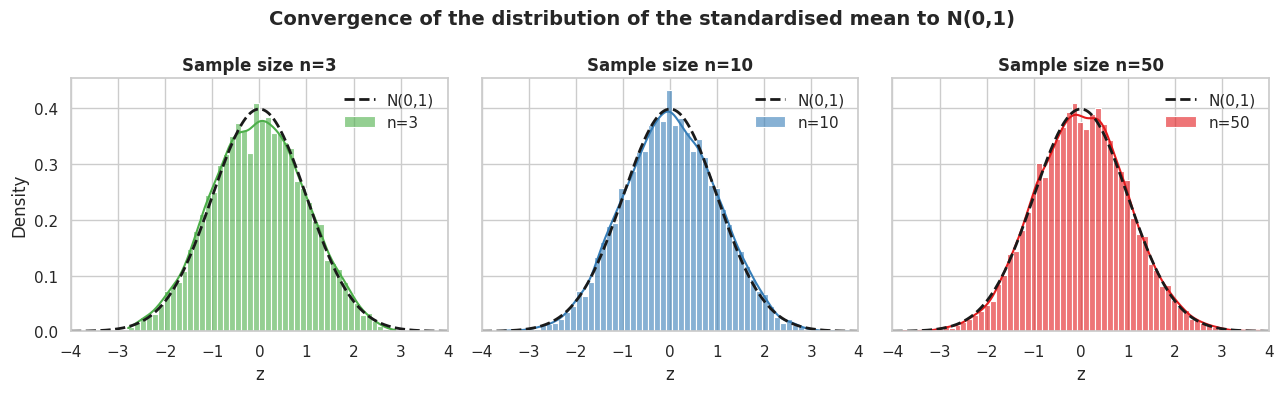

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_theme(style="whitegrid")

# Settings
len_random_array = 10000
ns = [3, 10, 50]   # sample sizes
colours = ['#4daf4a', '#377eb8', '#e41a1c']

# Mean and standard deviation of U(0,1)
mu, sigma = 0.5, np.sqrt(1/12)

fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for i, n in enumerate(ns):
    # Generate n × len_random_array matrix of uniform(0,1)
    rnds = np.random.rand(n, len_random_array)
    means = rnds.mean(axis=0)

    # Standardise
    z = (means - mu) / (sigma / np.sqrt(n))

    # Histogram + KDE
    sns.histplot(
        z, stat="density", kde=True,
        color=colours[i], alpha=0.6,
        edgecolor="white", linewidth=0.8,
        ax=axes[i], label=f'n={n}'
    )

    # Overlay normal curve
    x = np.linspace(-4, 4, 400)
    axes[i].plot(x, norm.pdf(x, 0, 1),
                 'k--', lw=2.0, label='N(0,1)')

    # Formatting
    axes[i].set_title(f'Sample size n={n}', fontsize=12, weight="bold")
    axes[i].set_xlim([-4, 4])
    axes[i].set_xlabel("z")
    if i == 0:
        axes[i].set_ylabel("Density")
    axes[i].legend(frameon=False)

plt.suptitle("Convergence of the distribution of the standardised mean to N(0,1)", 
             fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


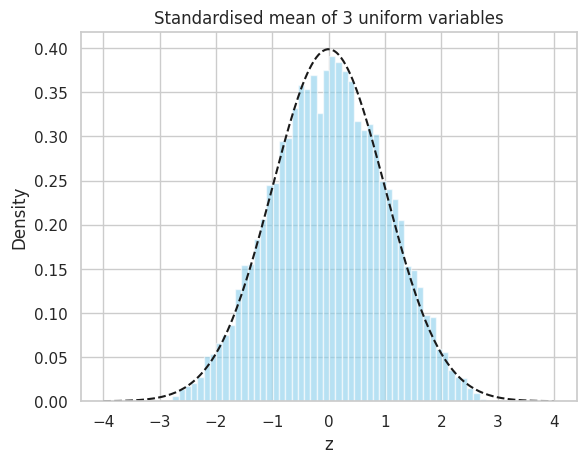

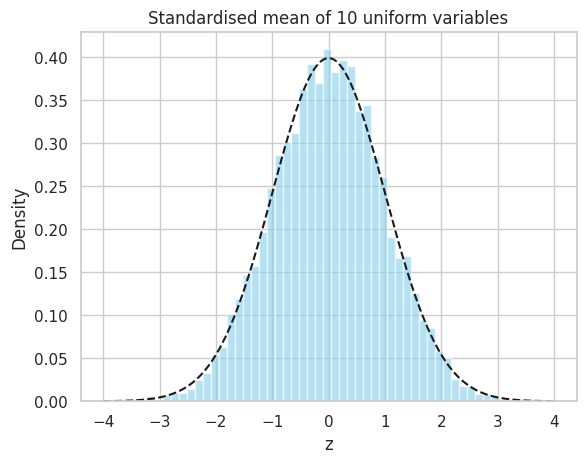

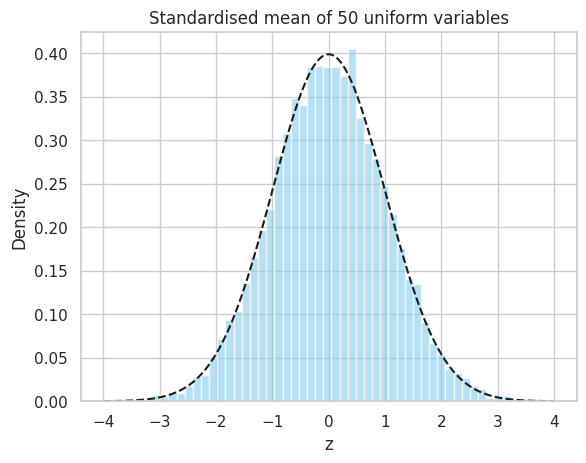

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

len_random_array = 10000
ns = [3, 10, 50]
mu, sigma = 0.5, np.sqrt(1/12)

for n in ns:
    z = (np.random.rand(n, len_random_array).mean(axis=0) - mu) / (sigma/np.sqrt(n))
    plt.hist(z, bins=50, density=True, alpha=0.6, color='skyblue')
    x = np.linspace(-4, 4, 200)
    plt.plot(x, norm.pdf(x), 'k--')
    plt.title(f'Standardised mean of {n} uniform variables')
    plt.xlabel('z'); plt.ylabel('Density')
    plt.show()
